In [18]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Task 1: Become familiar with the dataset

In [12]:
#Read the dataset from the URL
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df = pd.read_csv(URL)

# Show the first few rows of the DataFrame to analyze the first rows
print(df.head())


   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


# Task 2: Generate Descriptive Statistics and Visualizations

### * For the "Median value of owner-occupied homes" provide a boxplot

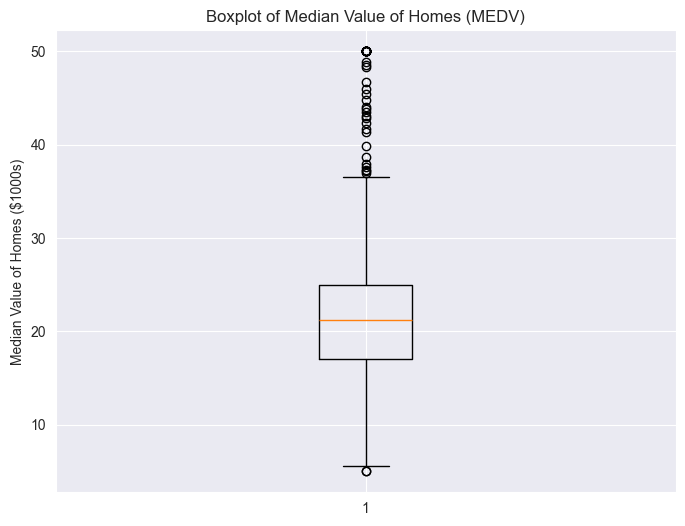

In [13]:
# Creating the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['MEDV'])
plt.title('Boxplot of Median Value of Homes')
plt.ylabel('Median Value of Homes')
plt.grid(True)
plt.show()

### The boxplot shows the distribution of median home values (MEDV) in thousands of dollars. The median value is around $21,000. The whiskers extend to 1.5 times the IQR from Q1 and Q3, with circles indicating outliers. The data is right-skewed, meaning there are more high-value homes.

### * Provide a  bar plot for the Charles river variable

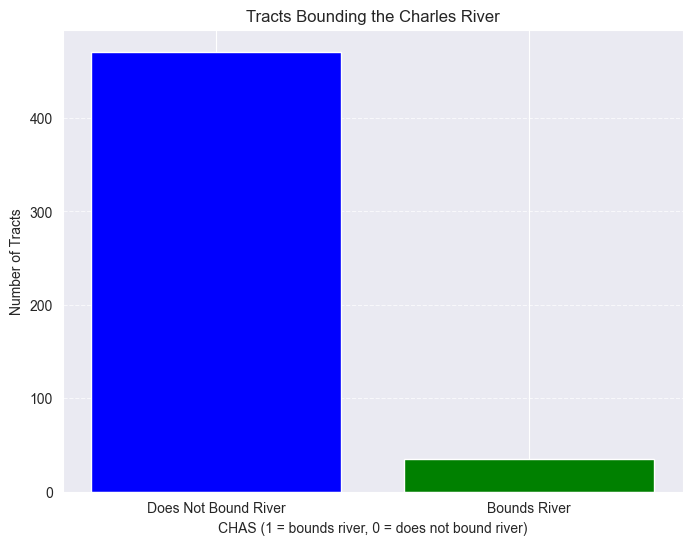

In [14]:
# Creating the bar plot for the Charles River variable
chas_counts = df['CHAS'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(chas_counts.index, chas_counts.values, color=['blue', 'green'])
plt.title('Tracts Bounding the Charles River')
plt.xlabel(' (1 = bounds river, 0 = does not bound river)')
plt.ylabel('Number of Tracts')
plt.xticks([0, 1], ['Does Not Bound River', 'Bounds River'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### The bar plot shows CHAS distribution: 1 means a tract bounds the river, 0 means it does not. Most tracts do not bound the river, indicated by the taller blue bar for 0, while fewer tracts bound the river, shown by the shorter green bar for 1.

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

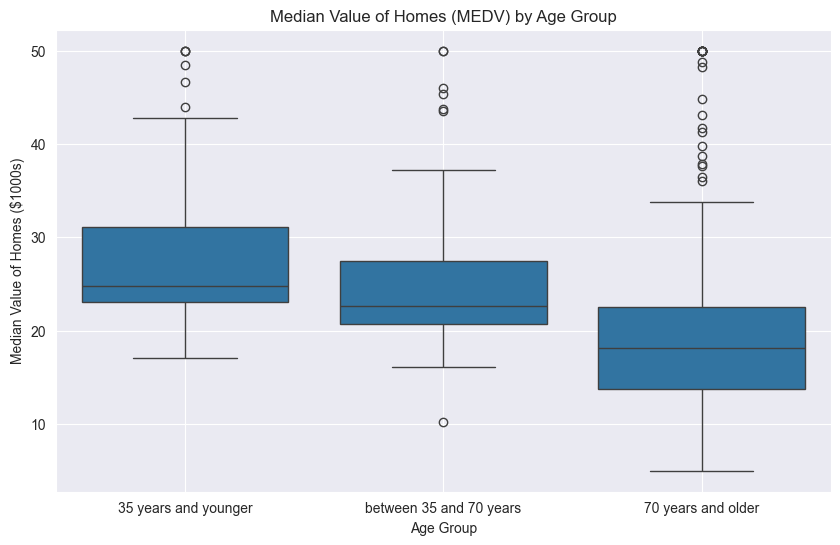

In [15]:
# Discretize the AGE variable
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
df['AGE_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels, include_lowest=True)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=df)
plt.title('Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Homes ($1000s)')
plt.grid(True)
plt.show()

###  The boxplot shows median home values (MEDV) for three age groups: 35 years and younger, between 35 and 70 years, and 70 years and older. Homes in the youngest and oldest groups generally have higher median values than those in the middle group. Outliers in all groups indicate variability in home values.

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

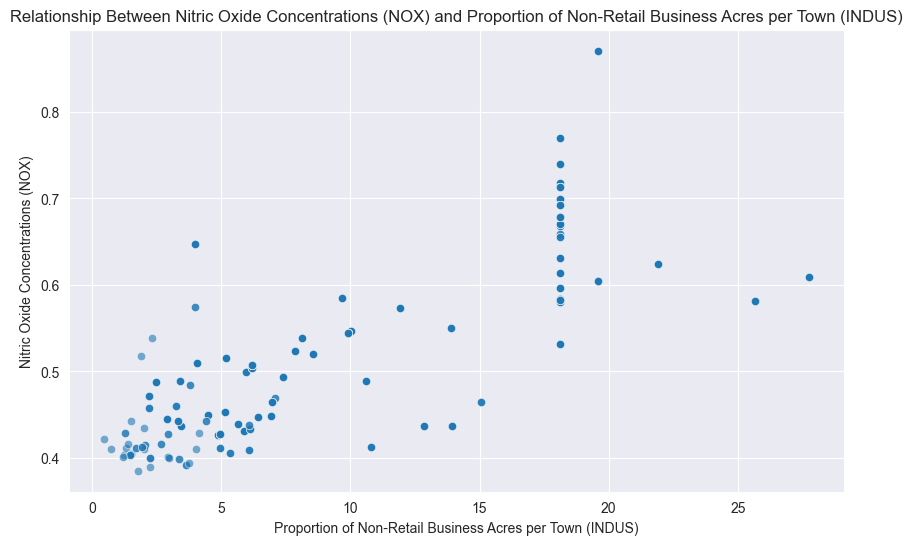

In [16]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['INDUS'], df['NOX'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Relationship Between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.grid(True)
plt.show()

### The scatter plot shows the relationship between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). There is a positive correlation, meaning that as industrial areas increase, Nitric Oxide levels also rise. This suggests higher pollution in areas with more industrial activity.

### Create a histogram for the pupil to teacher ratio variable

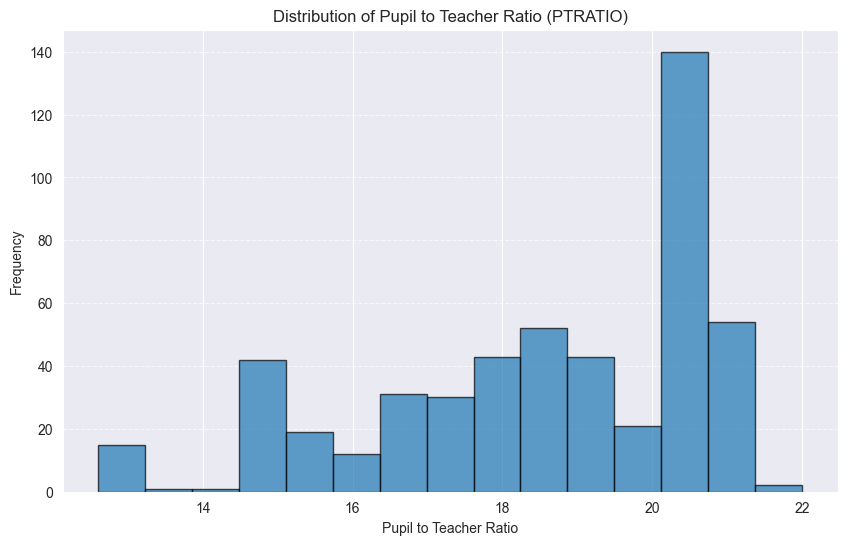

In [17]:
# Creating the histogram for PTRATIO
plt.figure(figsize=(10, 6))
plt.hist(df['PTRATIO'], bins=15, edgecolor='black', alpha=0.7)
plt.title('Distribution of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### The histogram shows the distribution of the pupil-to-teacher ratio (PTRATIO) across towns. Most towns have a ratio between 18 and 20, with 20 being the most common. There are fewer towns with ratios below 16 or above 20. This suggests most towns have high pupil-to-teacher ratios, indicating larger class sizes.

# Task 3: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


In [19]:
# Separate the MEDV values into two groups based on the CHAS variable
medv_bounded_by_river = df[df['CHAS'] == 1]['MEDV']
medv_not_bounded_by_river = df[df['CHAS'] == 0]['MEDV']

# Perform the T-test
t_stat, p_value = stats.ttest_ind(medv_bounded_by_river, medv_not_bounded_by_river)

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


In [1]:
print("YES, there is a significant difference in the median value")\
    
    
# Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles River (CHAS = 1) and those not bounded by the Charles River (CHAS = 0).
# Alternate Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles River and those not bounded by the Charles River.



YES, there is a significant difference in the median value


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


In [22]:
# Discretize the AGE variable
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
df['AGE_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels, include_lowest=True)

# Perform the ANOVA test
model = ols('MEDV ~ C(AGE_Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
print(anova_table)

                    sum_sq     df         F        PR(>F)
C(AGE_Group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


In [24]:
print("YES ,there is a significant difference in the median values of houses for different age groups.")


YES ,there is a significant difference in the median values of houses for different age groups.


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)



In [25]:
# Calculate the Pearson correlation coefficient and p-value
corr_coefficient, p_value = stats.pearsonr(df['NOX'], df['INDUS'])

# Display the results
print("Pearson correlation coefficient:", corr_coefficient)
print("P-value:", p_value)
# Null Hypothesis (H0): There is no significant difference in the median values of houses across the three age groups (35 years and younger, between 35 and 70 years, and 70 years and older).
# Alternate Hypothesis (H1): There is a significant difference in the median values of houses across the three age groups.

Pearson correlation coefficient: 0.7636514469209157
P-value: 7.91336106123623e-98


In [27]:
print("There is a significant relationship between NOX and INDUS.")
# Null Hypothesis (H0): There is no significant correlation between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
# Alternate Hypothesis (H1): There is a significant correlation between Nitric Oxide concentrations and the proportion of non-retail business acres per town.

There is a significant relationship between NOX and INDUS.


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [28]:

# Define the dependent variable (MEDV) and the independent variable (DIS)
X = df['DIS']
y = df['MEDV']

# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Display the results
print(model.summary())
# Null Hypothesis (H0): There is no significant impact of the weighted distance to the five Boston employment centers (DIS) on the median value of owner-occupied homes (MEDV).
# Alternate Hypothesis (H1): There is a significant impact of the weighted distance to the five Boston employment centers on the median value of owner-occupied homes.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.21e-08
Time:                        21:21:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0